No.of Updates before coverge 1


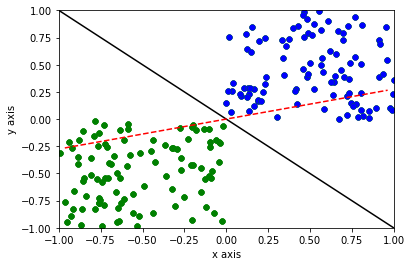

No.of Updates before coverge 1


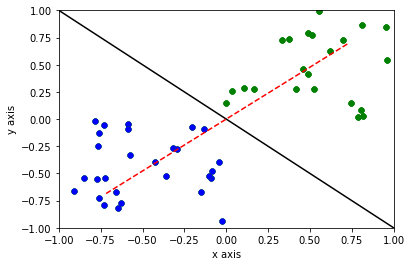

100


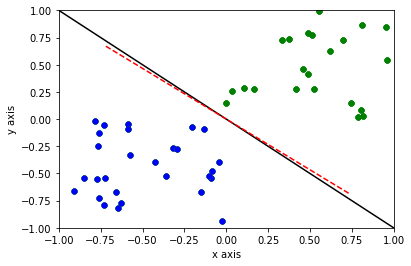

In [1]:
#Problem 5 Perceptron Learning Algorithm

import numpy as np
%matplotlib inline
from matplotlib import pyplot as mp
from pylab import rand,norm
import random as r

# this function generates random points between(-1,1)

def generate_input_data():
    N = 100
    x1_negative = np.random.uniform(-1,0,N)
    y1_positive = np.random.uniform(0,1,N)
    x2_positive = np.random.uniform(0,1,N)
    y2_negative = np.random.uniform(-1,0,N)

    inputs_X = []
    for i in range(N):
        inputs_X.append([y1_positive[i],x2_positive[i],1])
        inputs_X.append([x1_negative[i],y2_negative[i],-1])
    return inputs_X

#this function plots the random points scattered on basis of label 1/-1

def plotting_data(inputs_X):
    for i ,x in enumerate(inputs_X):
        for j in x:
            if(j==1):
                mp.scatter(x[0], x[1], s=10, marker='o', linewidths=3,color="blue")
            else:
                mp.scatter(x[0], x[1], s=10, marker='o', linewidths=3,color="green")

    mp.plot([-1,1],[1,-1],'black')
    mp.xlabel('x axis')
    mp.ylabel('y axis')


#this Perceptron alogorithm runs for the randomly generated points upto 100 iteration limit where it tries to converge data

def Perceptron(inputs_X):
    weight = rand(2)*2-1 # assign random weights
    iterations = 0
    learningRate = 0.1
    while True:
        for i,j in enumerate(inputs_X):
            x = [j[0],j[1]]
            y = j[2]
        result = x[0]*weight[0]+x[1]*weight[1] # dot product of input x features and weights
        if(result>=0):
            predict_y = 1
        else:
            predict_y =-1
        if(y!= result): #incase the weight 0 multipled to +ve1 and -ve 1 inputs,contradicting sign, results both 0 at first ateration 
            error = y - predict_y
            weight[0] += learningRate*error*x[0]
            weight[1] += learningRate*error*x[1]
        iterations += 1   
        if(error == 0.0 or iterations >= 100):
            print("No.of Updates before coverge",iterations) 
            break
            
#plotting the random poiunts with weights 

    n = norm(weight)
    W = weight/n
    W1 = [-W[1], W[0]]
    W2 = [W[1],-W[0]]
    mp.plot([W1[0], W2[0]],[W1[1], W2[1]],'--r')
    mp.ylim([-1,1])
    mp.xlim([-1,1])
    mp.show()
    mp.show()


#generates noise data by selecting 50 saples from input random data

def generate_noise_data(inputs_X):
    noise_data = r.sample(inputs_X,50)
    for i ,x in enumerate(noise_data):
        if(x[2]== 1):
            x[2] = -1
        else:
            x[2] = 1

    return noise_data

#Running pockect algorithm where  perceptron runs only if we have the miss classfied points existing in the input array

def pocket_alogrithm(inputs_X):
    weight = rand(2)*2-1
    iterations = 0
    learningRate = 0.1
    inputs_misclassified = []
    eta = 0.3
    while True:
        for i,j in enumerate(inputs_X):
            x = [j[0],j[1],j[2]]
            y = j[2]
        result = x[0]*weight[0]+x[1]*weight[1]
        if(result>=0):
            predict_y = 1
        else:
            predict_y =-1
        if(y!= result):
            inputs_misclassified.append([x[0],x[1],x[2]])     
        if(len(inputs_misclassified)==0 or iterations ==100):
            break
        
        m = r.choice(inputs_misclassified)
        weight = weight + eta*m[0]*m[1]*m[2] 
        inputs_misclassified = []
        iterations += 1
    print(iterations)
    n = norm(weight)
    W = weight/n
    W1 = [-W[1], W[0]]
    W2 = [W[1],-W[0]]
    mp.plot([W1[0], W2[0]],[W1[1], W2[1]],'--r')
    mp.ylim([-1,1])
    mp.xlim([-1,1])
    mp.show()
   
# Plot the examples (xn; yn) as well as the target function f on a plane.Be sure to mark the examples from
#different classes differently, and add labels to the axes of the plot.  

input_data = generate_input_data()
plotting_data(input_data)

#(a) Run the perceptron learning algorithm on the data set above. Report the number of updates that the
#algorithm takes before converging. Plot the examples (xn; yn), the target function f, and the final hypothesis
#g in the same figure. Comment on whether f is close to g.

# Observation: since the data is linearly separable f(y actual) is closer to hypothesis error =0. But when we multipl with weights it changes
Perceptron(input_data)

#(b)Now add some noise to the data set you generated by randomly selecting 50 examples from each class and
#assigning them wrong output, e.g., assign 􀀀1 to examples originally having label +1. Run PLA again and
#report your observations.

noise_input_data = generate_noise_data(input_data)
plotting_data(noise_input_data)
Perceptron(noise_input_data)

#Obesrvation: the algorithm doen't coverge the random points need to run pockect algorithm

#(c)Run PLA with pocket algorithm. Plot the new data set from (b), the target function f, and the final
#hypothesis g in the same figure. Compare the result with (b).

plotting_data(noise_input_data)
pocket_alogrithm(noise_input_data)

In [30]:
#Reference to the above work
#https://github.com/topics/perceptron-learning-algorithm?l=python
#https://towardsdatascience.com/an-introduction-to-perceptron-algorithm-40f2ab4e2099